In [14]:
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from random import uniform, seed
import seaborn as sns
import numpy as np
seed(42069)

In [15]:
emip_metadata = pd.read_csv("../../datasets/emip-fixations/metadata/emip_metadata.csv")
cscw_metadata = pd.read_csv("../../datasets/cscw/metadata/CSCW - Sheet1.csv", sep=";")
fractions_metadata = pd.read_csv("../../datasets/fractions/metadata/DataSet_PrePost.csv")

In [16]:
emip_labels = emip_metadata["correct_vehicle"] + emip_metadata["correct_rectangle"]
cscw_labels = cscw_metadata["Posttest.Score"]
fractions_labels = fractions_metadata["Post_SumOfCorrect_NewSum"]

In [17]:
emip_labels = (emip_labels-emip_labels.min())/(emip_labels.max()-emip_labels.min())
cscw_labels = (cscw_labels-cscw_labels.min())/(cscw_labels.max()-cscw_labels.min())
fractions_labels = (fractions_labels-fractions_labels.min())/(fractions_labels.max()-fractions_labels.min())

In [33]:
def get_baseline(labels):
    error = labels - labels.mean()
    error_squared = (error**2).mean()
    baseline = math.sqrt(error_squared)
    return baseline

def get_random_normal_prediction(labels):
    prediction = [np.random.normal(loc=labels.mean(), scale=labels.std()) for i in labels]
    rmse_baseline = mean_squared_error(labels, prediction, squared=False)
    return rmse_baseline

def get_random_uniform_prediction(labels):
    prediction = [np.random.normal(loc=labels.mean(), scale=labels.std()) for i in labels]
    rmse_baseline = mean_squared_error(labels, prediction, squared=False)
    return rmse_baseline

def get_baseline(labels):
    normal_rmses = [get_random_normal_prediction(labels) for i in range(300)]
    avg_normal_rmse= sum(normal_rmses)/len(normal_rmses)
    uniform_rmses = [get_random_prediction(labels) for i in range(300)]
    avg_uniform_rmse= sum(uniform_rmses)/len(uniform_rmses)
    return (avg_normal_rmse + avg_uniform_rmse)/2

In [34]:
print(get_baseline(cscw_labels), "CSCW baseline")
print(get_baseline(emip_labels), "EMIP baseline")
print(get_baseline(fractions_labels), "Fractions labels")
print(get_baseline(pd.concat((emip_labels, fractions_labels))), "fractions and emip baseline")
print(get_baseline(pd.concat((cscw_labels, fractions_labels))), "fractions and cscw baseline")
print(get_baseline(pd.concat((emip_labels, cscw_labels))), "cscw and emip baseline")
print(get_baseline(pd.concat((emip_labels, cscw_labels, fractions_labels))), "fractions, cscw and emip baseline")

0.2908760450323469 CSCW baseline
0.439290486489032 EMIP baseline
0.32282308037996776 Fractions labels
0.4164014232967893 fractions and emip baseline
0.33010126065957834 fractions and cscw baseline
0.4083722775233032 cscw and emip baseline
0.3982188493558526 fractions, cscw and emip baseline


In [35]:
errors = {
    "cscw": get_baseline(cscw_labels),
    "emip": get_baseline(emip_labels),
    "fractions": get_baseline(fractions_labels),
    "emip_fractions": get_baseline(pd.concat((emip_labels, fractions_labels))),
    "fractions_cscw": get_baseline(pd.concat((cscw_labels, fractions_labels))),
    "emip_cscw": get_baseline(pd.concat((emip_labels, cscw_labels)))
}

In [144]:
errors

{'cscw': 0.3552489116680893,
 'emip': 0.42394546793329624,
 'fractions': 0.39408968077906337,
 'emip_fractions': 0.41716772890834486,
 'fractions_cscw': 0.3764225564812511,
 'emip_cscw': 0.4082892075095877}

In [185]:
label_df = pd.DataFrame()
label_df["emip"] = emip_labels
label_df["cscw"] = cscw_labels
label_df["fractions"] = fractions_labels
label_df
label_df["random"] = pd.Series([uniform(0, 1) for i in range(len(cscw_labels))])
sns.kdeplot(label_df)

ValueError: If using all scalar values, you must pass an index

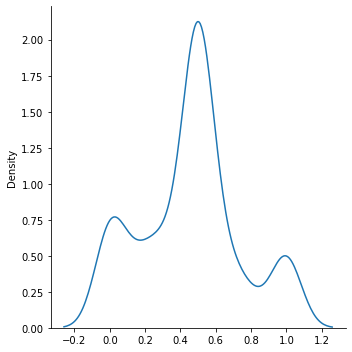

In [155]:
sns.displot(pd.concat((emip_labels, cscw_labels, fractions_labels)), kind="kde")

In [175]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
